In [1]:
from data_pipeline import DataLoader 
from engine.backtester import Backtester
from strategies import *
import pandas as pd

In [2]:
df = DataLoader.load_data("../data/data.csv")
if df.empty:
    raise ValueError("No data loaded. Exiting.")
df.head()

--- Loading Data... ---
--- Data is loaded ---


,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,
2015-10-08,0.00,245.00,0.00,243.95,31.754703,7760.410291
2015-10-09,243.95,249.97,243.60,245.39,56.027841,13880.647404
2015-10-10,245.39,246.30,244.60,246.30,39.348777,9651.169453
2015-10-11,246.30,249.50,245.96,249.50,14.487783,3581.307675
2015-10-12,249.50,249.50,247.60,247.60,62.787480,15563.142766


In [3]:
strategies = [
    BuyAndHoldStrategy(),
    TrendFollowingStrategy(short_window=20, long_window=50),
    MeanReversionStrategy(short_window=20, long_window=50),
]
backtester = Backtester(
    df=df,
    strategies=strategies,
    initial_capital=10000.0,
    fee=0.001,
)
backtester.run()
metrics = backtester.get_metrics()
metrics_df = pd.DataFrame.from_dict(metrics, orient="index")
metrics_df

--- BackTester running ---
--- Running Strategy 1/3: BuyAndHoldStrategy ---
Template Strategy
--- Creating Strategy Features ---
--- Strategy Features Created ---
--- Creating Strategy Signals ---
--- Strategy Signals Created ---
--- Strategy 1 completed ---
--- Running Strategy 2/3: TrendFollowingStrategy ---
Templete Strategy
--- Creating Strategy Features ---
--- Strategy Features Created ---
--- Creating Strategy Signals ---
--- Strategy Signals Created ---
--- Strategy 2 completed ---
--- Running Strategy 3/3: MeanReversionStrategy ---
------------------------
Mean Reversion Strategy
------------------------
LONG STRATEGY DESCRIPTION
------------------------
--- Creating Strategy Features ---
--- Strategy Features Created ---
--- Creating Strategy Signals ---
--- Strategy Signals Created ---
--- Strategy 3 completed ---
--- BackTester ended running ---


,Total Return,Annualized Return,Annualized Volatility,Max Drawdown,Sharpe Ratio
BuyAndHoldStrategy,6887.28%,79.80%,76.17%,-83.67%,1.05
TrendFollowingStrategy,1452.73%,46.06%,76.18%,-78.55%,0.60
MeanReversionStrategy,-99.90%,-61.72%,72.10%,-99.92%,-0.86


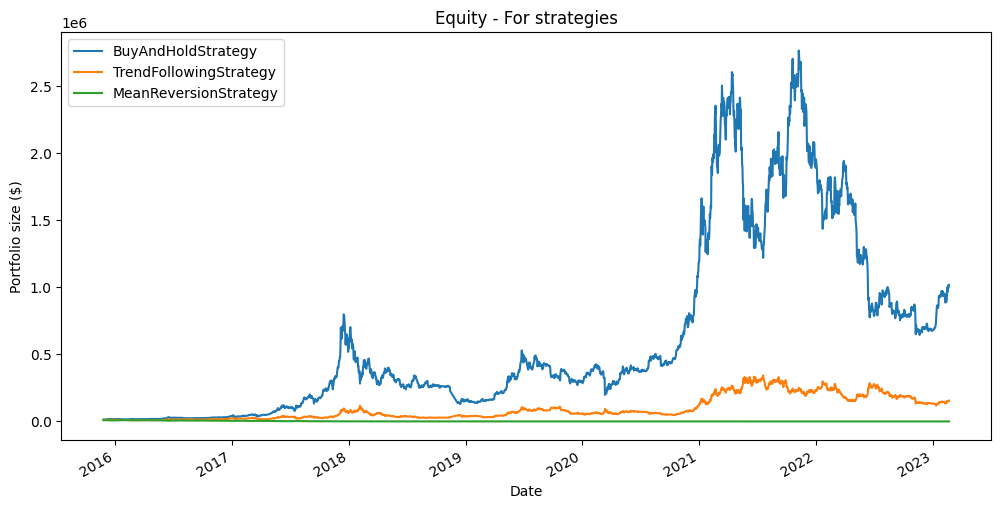

In [4]:
backtester.plot_equity()